In [ ]:
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import numpy as np
# set seed for reproducibility
np.random.seed(0)

---

## Part 1: Data Loading and Exploration




---



In this section, we'll load the H&M dataset and conduct exploratory data analysis to understand user behavior patterns, articles distribution, and data quality.



#### 1.1 Load the MovieLens Dataset


In [5]:
customers_df = pd.read_csv('customers.csv.zip')
articles_df = pd.read_csv('articles.csv.zip')
transactions_df = pd.read_csv('transactions_train.csv.zip', parse_dates=["t_dat"])

In [ ]:
print(f"📊 Customers dataset shape: {customers_df.shape}")
print(f"📊 Articles dataset shape: {articles_df.shape}")
print(f"📊 Transactions dataset shape: {transactions_df.shape}")

📊 Customers dataset shape: (1371980, 7)
📊 Articles dataset shape: (105542, 25)
📊 Transactions dataset shape: (31788324, 5)


#### 1.2 Explore and clean dataset



##### 1.2.1 Customers dataset

In [ ]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [6]:
customers_df["customer_id"] = customers_df["customer_id"].astype(str)

In [ ]:
# get the number of missing data points per column
missing_values_count = customers_df.isnull().sum()/len(customers_df)*100

# look at the # of missing points in the first ten columns
missing_values_count[0:10].round(0)

,0
customer_id,0.0
FN,65.0
Active,66.0
club_member_status,0.0
fashion_news_frequency,1.0
age,1.0
postal_code,0.0


We note that the Active and FN data are relatively incomplete.

We will examine them more closely to see if they are still useful for understanding users.

In [ ]:
customers_df.nunique()

,0
customer_id,1371980
FN,1
Active,1
club_member_status,3
fashion_news_frequency,3
age,84
postal_code,352899


In [ ]:
customers_df['FN'].unique()

array([nan,  1.])

In [ ]:
customers_df['Active'].unique()

array([nan,  1.])

In [ ]:
customers_df["club_member_status"].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [ ]:
customers_df["fashion_news_frequency"].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [7]:
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df[['club_member_status']] = customers_df[['club_member_status']].fillna('None')
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].replace('NONE', 'None')
customers_df['fashion_news_frequency'] = customers_df["fashion_news_frequency"].fillna('None')

In [8]:
# We ll change this values to int
customers_df["Active_Code"] = pd.Categorical(customers_df["Active"]).codes
customers_df["FN_Code"] = pd.Categorical(customers_df["FN"]).codes
customers_df["club_member_status_Code"] = pd.Categorical(customers_df["club_member_status"]).codes
customers_df["fashion_news_frequency_Code"] = pd.Categorical(customers_df["fashion_news_frequency"]).codes

In [9]:
# Fill missing age data
mean_age = customers_df["age"].mean()
customers_df["age"] = customers_df["age"].fillna(mean_age).astype(np.int8)
print(f"Customers age isna after replace with mean ({int(mean_age)}): {sum(customers_df.age.isna())}")

Customers age isna after replace with mean (36): 0


In [10]:
# Simplify postal code
postal_code_map = {pc: pc_simple for pc_simple, pc in enumerate(customers_df.postal_code.unique().tolist())}
customers_df['postal_code'] = customers_df['postal_code'].map(postal_code_map).astype('int32')

In [11]:
# Add age group
def age_to_group(age):
    if age < 20: return "<20"
    elif age < 25: return '20-25'
    elif age < 30: return '25-30'
    elif age < 40: return '30-40'
    elif age < 50: return '40-50'
    else: return '50+'

In [12]:
customers_df['age_group'] = customers_df['age'].apply(age_to_group)

##### 1.2.2 Articles dataset

In [13]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
articles_df.describe(include=object)

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_code,index_name,index_group_name,section_name,garment_group_name,detail_desc
count,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105126
unique,45875,131,19,30,50,8,20,250,10,10,5,56,21,43404
top,Dragonfly dress,Trousers,Garment Upper body,Solid,Black,Dark,Black,Jersey,A,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,T-shirt in printed cotton jersey.
freq,98,11169,42741,49747,22670,42706,22585,4604,26001,26001,39737,7295,21445,159


In [14]:
articles_df['article_id'] = articles_df['article_id'].astype(str)

In [15]:
articles_df = articles_df.drop_duplicates()

In [16]:
articles_df['detail_desc'] = articles_df['detail_desc'].fillna('Not Available')

In [17]:
articles_df["garment_group_name"].unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [ ]:
articles_df["perceived_colour_value_name"].unique()

array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object)

In [ ]:
articles_df["department_name"].unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [ ]:
articles_df["index_group_name"].unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [ ]:
articles_df["product_type_name"].unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

We will remove from our articles those that cannot be categorized.

In [18]:
articles_df = articles_df[ articles_df['garment_group_name'] != 'Unknown']
articles_df = articles_df[ articles_df['perceived_colour_value_name'] != 'Unknown']
articles_df = articles_df[ articles_df['perceived_colour_value_name'] != 'Undefined']

In [19]:
print(len(articles_df))

101558


##### 1.2.3 Transactions dataset

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [20]:
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

In [21]:
transactions_df = transactions_df.dropna(subset=['customer_id', 'article_id', 't_dat'])
transactions_df.drop_duplicates()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [22]:
transactions_df["customer_id"] = transactions_df["customer_id"].astype(str)
transactions_df["article_id"] = transactions_df["article_id"].astype(str)

In [ ]:
transactions_df.describe()

,t_dat,price,sales_channel_id
count,31788324,3.178832e+07,3.178832e+07
mean,2019-09-15 17:27:46.894452992,2.782927e-02,1.704028e+00
min,2018-09-20 00:00:00,1.694915e-05,1.000000e+00
25%,2019-03-28 00:00:00,1.581356e-02,1.000000e+00
50%,2019-08-25 00:00:00,2.540678e-02,2.000000e+00
75%,2020-03-29 00:00:00,3.388136e-02,2.000000e+00
max,2020-09-22 00:00:00,5.915254e-01,2.000000e+00
std,NaN,1.918113e-02,4.564786e-01


In [23]:
max_dt = transactions_df['t_dat'].max()
min_dt = transactions_df['t_dat'].min()

In [ ]:
print("max = ", max_dt)
print("min_dt = ", min_dt)

max =  2020-09-22 00:00:00
min_dt =  2018-09-20 00:00:00


In [24]:
# We'll remove transactions from the COVID period: too specifics.
transactions_df_before = transactions_df[transactions_df['t_dat'] < '2020-03-15' ]
transactions_df_after = transactions_df[ transactions_df['t_dat'] > '2020-05-15']
transactions_df = pd.concat([transactions_df_before, transactions_df_after])

In [ ]:
print(len(transactions_df))

29413740


In [25]:
def remove_pre_christmas_transactions(df, min_date, max_date):
    df_result = pd.DataFrame()

    # Generate a list of all date ranges to remove
    years = range(min_date.year, max_date.year)

    for year in years:
        first_year_day = pd.Timestamp(year=year, month=1, day=1)
        last_year_day = pd.Timestamp(year=year, month=12, day=31)
        start_christmas = pd.Timestamp(year=year, month=12, day=10)
        end_christmas = pd.Timestamp(year=year, month=12, day=25)

        transactions_df_before = df[(df['t_dat'] >= first_year_day) & (df['t_dat'] < start_christmas)]
        transactions_df_after = df[(df['t_dat'] <= last_year_day) & (df['t_dat'] > end_christmas)]

        df_result = pd.concat([df_result, transactions_df_before, transactions_df_after], ignore_index=True)

    return df_result

In [26]:
# We'll remove transactions before christmas period: too specific.
transactions_df = remove_pre_christmas_transactions(transactions_df, min_dt, max_dt)

In [27]:
print(len(transactions_df))

19558461


## Part 2: Merge data and pre processing

#### 2.1 Pre processing data



##### 2.1.1 Pre processing on customers *dataset*


In [ ]:
print(len(customers_df[ (customers_df['fashion_news_frequency'] == 'None') & (customers_df['club_member_status'] == 'None')]))

5740


We can already remove from our dataset those customers who are not regulars or club members, as they will not provide relevant information.

Indeed, we can assume that they have made very occasional or even specific purchases.

In [28]:
customers_df = customers_df[ (customers_df['fashion_news_frequency'] != 'None') | (customers_df['club_member_status'] != 'None')]

In [ ]:
corr_fashion_freq = np.corrcoef(customers_df['Active_Code'], customers_df['fashion_news_frequency_Code'])[0, 1]
print(f"Correlation between data Active and fashion_news_frequency = {corr_fashion_freq}")
corr_club_member_st = np.corrcoef(customers_df['Active_Code'], customers_df['club_member_status_Code'])[0, 1]
print(f"Correlation between data Active and club_member_status = {corr_club_member_st}")

Correlation between data Active and fashion_news_frequency = 0.9710491010375923
Correlation between data Active and club_member_status = -0.15869889339212945


In [ ]:
corr_fashion_freq = np.corrcoef(customers_df['FN_Code'], customers_df['fashion_news_frequency_Code'])[0, 1]
print(f"Correlation between data FN and fashion_news_frequency =  {corr_fashion_freq}" )
corr_club_member_st = np.corrcoef(customers_df['FN_Code'], customers_df['club_member_status_Code'])[0, 1]
print(f"Correlation between data FN and club_member_status = {corr_club_member_st}")

Correlation between data FN and fashion_news_frequency =  0.9900107026387994
Correlation between data FN and club_member_status = -0.1620135882582823


As we had imagined, the Active and FN data are both strongly correlated with the fashion_news_frequency data.

It is therefore not necessary to keep all 3; **we will only keep the**<font color="#5f34ef">  **fashion_news_frequency**</font> data.

In [29]:
del customers_df['club_member_status_Code']
del customers_df['fashion_news_frequency_Code']
del customers_df['FN_Code']
del customers_df['Active_Code']
del customers_df['FN']
del customers_df['Active']

In [ ]:
print(len(customers_df))

1366240


In [30]:
# Remove 10% of customers randomly from each age group
def remove_random_10_percent(group):
    return group.sample(frac=0.90, random_state=1)

# Apply the function with the updated parameter to avoid the warning
customers_df = customers_df.groupby('age_group', group_keys=False).apply( remove_random_10_percent)

/tmp/ipython-input-3604335556.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customers_df = customers_df.groupby('age_group', group_keys=False).apply( remove_random_10_percent)


In [ ]:
print(len(customers_df))

1229615


In [ ]:
customers_df.head()

,customer_id,club_member_status,fashion_news_frequency,age,postal_code,age_group
200457,255e59e7dfe6ec69102a0b9ac043e3ce6f5c873e17e8a9...,ACTIVE,None,23,133234,20-25
572824,6ae331c93c21573a3eccd992a156b93d849c69b33d3bdd...,ACTIVE,None,21,94306,20-25
49863,0952b211bb46f7b72da6c03c20c9f1ef3a1645020acb9f...,ACTIVE,Regularly,20,36893,20-25
1113387,cfc0cfe6e9fdf90ccc7cf21b2089b688ea8ec1067262b6...,ACTIVE,None,20,275,20-25
178384,2135bc7d1fdccdb9131d8c4c24b1d03db3b4a02c80dc75...,ACTIVE,Regularly,21,49675,20-25


##### 2.1.2 Pre processing on articles dataset

In [31]:
# We will only keep items of which there are more than 4 in stock.
type_counts = articles_df['product_type_name'].value_counts()
filtered_types = type_counts[type_counts > 3]
articles_df = articles_df[articles_df['product_type_name'].isin(filtered_types.index)]

We will start by trying to get an idea of the types of products and their characteristics.

In [32]:
group_type_counts = articles_df['product_group_name'].value_counts()
group_type_percent = (group_type_counts / group_type_counts.sum() * 100).round(2)
GroupTop10 = group_type_percent.head(10)
import matplotlib.cm as cm

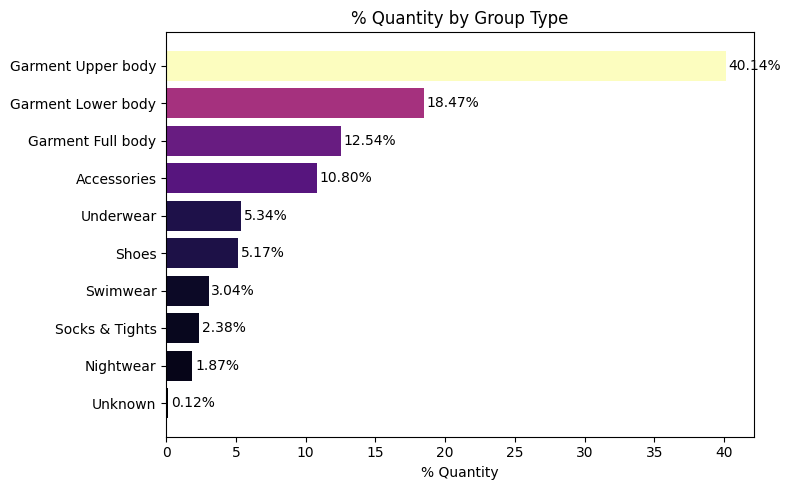

In [33]:
labels = GroupTop10.index[::-1]
values = GroupTop10.values[::-1]
norm = plt.Normalize(values.min(), values.max())
colors = cm.magma(norm(values))

plt.figure(figsize=(8, 5))
bars = plt.barh(GroupTop10.index[::-1], GroupTop10.values[::-1], color=colors)

# Add data labels to bars
for i, v in enumerate(GroupTop10.values[::-1]):
    plt.text(v + 0.2, i, f'{v:.2f}%', va='center')

plt.xlabel('% Quantity')
plt.title('% Quantity by Group Type')
plt.tight_layout()
plt.show()

It is easy to assume that we can remove products from our data whose product group is represented in very small quantities, as they will not be included in our recommendations.

In [34]:
articles_df = articles_df[articles_df['product_group_name'].isin(GroupTop10.index)]

In [35]:
type_percent = (type_counts / type_counts.sum() * 100).round(2)

/tmp/ipython-input-693208847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='coolwarm')


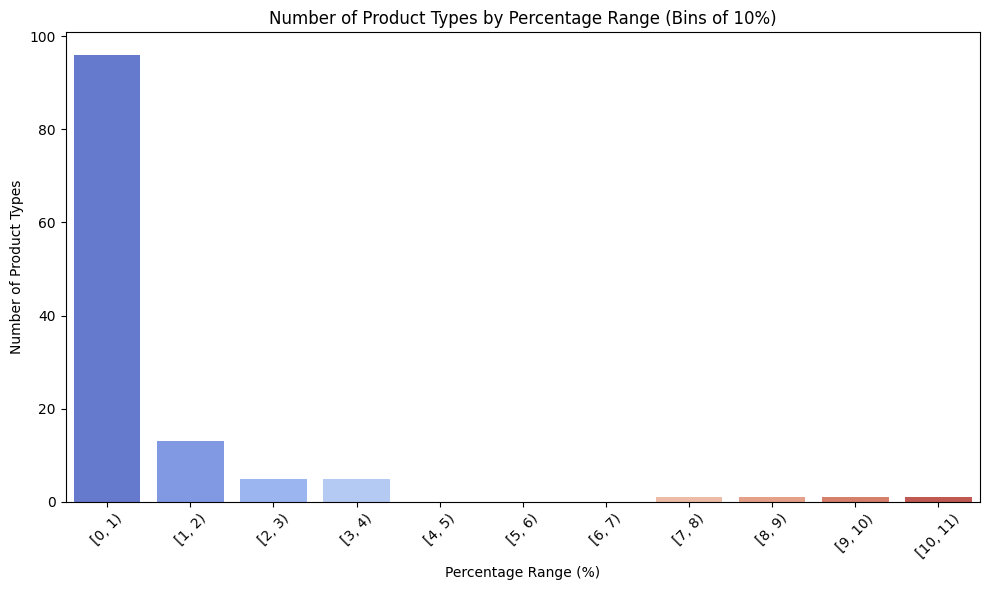

In [36]:
bins = range(0, 11 +1)

type_percent_binned = pd.cut(type_percent, bins=bins, right=False)

bin_counts = type_percent_binned.value_counts().sort_index()

# Step 4: Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='coolwarm')

plt.xlabel('Percentage Range (%)')
plt.ylabel('Number of Product Types')
plt.title('Number of Product Types by Percentage Range (Bins of 10%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1753740357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=more_than1_types.values, y=more_than1_types.index, palette='magma')


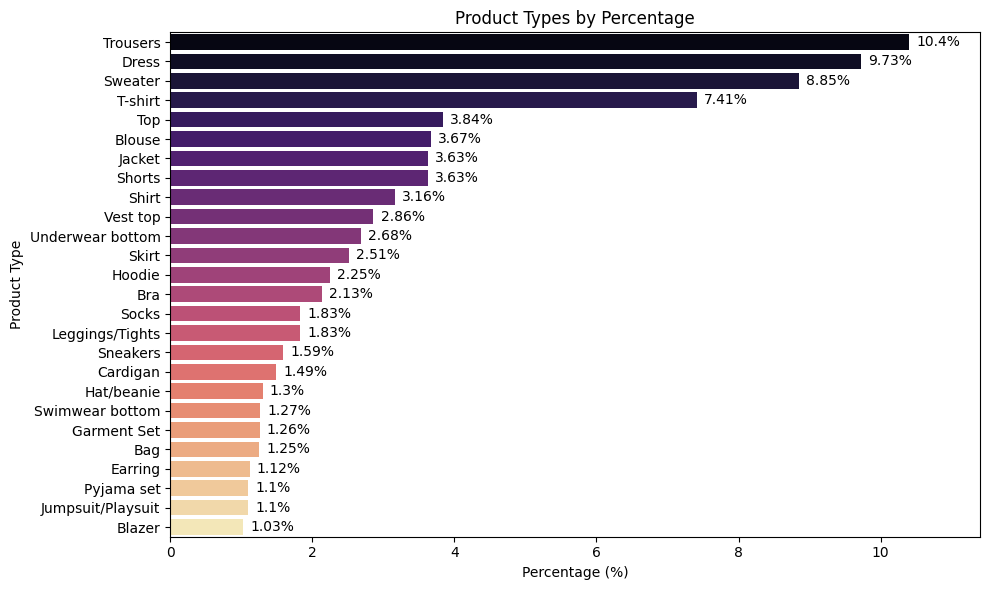

In [37]:
# we display types represented by more than 1%
more_than1_types = type_percent[type_percent > 1]

plt.figure(figsize=(10, 6))
sns.barplot(x=more_than1_types.values, y=more_than1_types.index, palette='magma')

# Add data labels to bars
for i, v in enumerate(more_than1_types.values):
    plt.text(v + 0.1, i, f"{v}%", color='black', va='center')

plt.xlabel('Percentage (%)')
plt.ylabel('Product Type')
plt.title(f'Product Types by Percentage')
plt.xlim(0, max(more_than1_types.values) + 1)
plt.tight_layout()
plt.show()

We will only keep items whose types are in the list more_than1_types.

In [38]:
articles_df = articles_df[articles_df['product_type_name'].isin(more_than1_types.index)]

In [ ]:
print(len(articles_df))

84234


In [39]:
# We want to keep only the best-selling item by 'product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name'
article_counts = articles_df.groupby(['product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name'])
transaction_df_merged_with = transactions_df.merge(articles_df, on='article_id', how='left')

# Count how many transactions per article within each group
counts = transaction_df_merged_with.groupby(
    ['product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name', 'article_id']
).size().reset_index(name='transaction_count')

# Count how many transactions per article within each group
counts = transaction_df_merged_with.groupby(
    ['product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name', 'article_id']
).size().reset_index(name='transaction_count')

# Sort by group columns and transaction count descending
counts_sorted = counts.sort_values(
    by=['product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name', 'transaction_count'],
    ascending=[True, True, True, True, True, False]
)

# Drop duplicates keeping the first (which has max transaction_count due to sorting)
most_sent_articles = counts_sorted.drop_duplicates(
    subset=['product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name'],
    keep='first'
)

##### 2.1.3 Pre processing on transactions


In [40]:
transactions_df = transactions_df[transactions_df['article_id'].isin(most_sent_articles['article_id'] )]

In [41]:
# We remove transactions from consumers who have not made at least 4 transactions
transactions_df = transactions_df.groupby('customer_id').filter(lambda x: len(x) >= 4)

In [42]:
# We remove transactions for products that have not been purchased in the last year
# Limit date:
limit_transaction_date = max_dt - pd.DateOffset(years=1)
recent_articles = transactions_df [transactions_df ['t_dat'] >= limit_transaction_date]['article_id'].unique()

In [43]:
# We remove transactions where customers have been previously excluded
transactions_df = transactions_df[transactions_df['customer_id'].isin(customers_df['customer_id'] )]

In [44]:
# we remove transactions for which items have been previously excluded.
transactions_df = transactions_df[transactions_df['article_id'].isin(recent_articles)]

In [ ]:
print(len(transactions_df))

1196312


#### 2.2 Merge data


In [45]:
transactions_merged_data = transactions_df.merge(customers_df, on='customer_id', how='left')
transactions_merged_data = transactions_merged_data.merge(articles_df, on='article_id', how='left')

In [ ]:
# Check merged data
print("\nMerged data shape:", transactions_merged_data.shape)
print("Missing values after merge:")
print(transactions_merged_data.isnull().sum())


Merged data shape: (1196312, 34)
Missing values after merge:
t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
club_member_status              0
fashion_news_frequency          0
age                             0
postal_code                     0
age_group                       0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no      

---

## Part 3: Sales and customers analyses

In [ ]:
df_sold_qty = transactions_df["article_id"].value_counts()
df_sold_qty=df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
df_sold_qty.head()

,sold_qty,count
0,706016001,19737
1,706016002,14624
2,562245001,11293
3,372860001,10619
4,610776002,10559


In [ ]:
df_sold_qty.describe()

,count
count,1936.000000
mean,617.929752
std,1241.919903
min,1.000000
25%,61.000000
50%,206.000000
75%,658.250000
max,19737.000000


**Summary statistics on the sold quantities:**


*   there are 1936 different articles in the transactions
*   There are items which have been sold only once
*   25% of sold products, have been sold 61658 or less times
*   50% were sold 65 or less times
*   75% were sold 286 or less times
*   The most sold item have been sold 19737 times


---
## Part 4: Training and evaluate recommandation modeling

In [46]:
!pip install git+https://github.com/daviddavo/lightfm


  Cloning https://github.com/daviddavo/lightfm to /tmp/pip-req-build-yff67lq2
  Running command git clone --filter=blob:none --quiet https://github.com/daviddavo/lightfm /tmp/pip-req-build-yff67lq2
  Resolved https://github.com/daviddavo/lightfm to commit f0eb500ead54ab65eb8e1b3890337a7223a35114
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp312-cp312-linux_x86_64.whl size=1095349 sha256=82269ebd681439f86871eb15edcf6be3ff5aa16d464135d329c63273686e3a2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-vaf8js6o/wheels/fd/89/93/70c1e5f378ee5043de89387ee3ef6852ff39e3b9eb44ecc1a3
Successfully built lightfm


In [47]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score
from lightfm.cross_validation import random_train_test_split

In [48]:
def compute_metrics(model, train, test, title="", context="") :

    train_precision = precision_at_k(model, train, k=12).mean()
    test_precision = precision_at_k(model, test, k=12).mean()

    train_recall = recall_at_k(model, train, k=10).mean()
    test_recall = recall_at_k(model, test, k=10).mean()

    train_auc = auc_score(model, train).mean()
    test_auc = auc_score(model, test).mean()

    plot_summary_table(title, context, f"{train_precision:.2f}", f"{test_precision:.2f}", f"{train_recall:.2f}", f"{test_recall:.2f}", f"{train_auc:.2f}", f"{test_auc:.2f}")

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_summary_table(title ="", context = "", precisionTrain= "", precisionTest="", recallTrain= "", recallTest="", aucTrain= "", aucTest=""):
    data = {
        "Context": [context],
        "Precision train": [precisionTrain],
        "Precision test": [precisionTest],
        "Recall train": [recallTrain],
        "Recall test": [recallTest],
        "AUC train": [aucTrain],
        "AUC test": [aucTest]
    }
    df = pd.DataFrame(data)

    fig, ax = plt.subplots(figsize=(12, 2))
    ax.axis('off')

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc='center',
        cellLoc='center'
    )

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(color='white', weight='bold')
            cell.set_facecolor('darkblue')
        else:
            cell.set_facecolor('#f2f2f2')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)

    for col in range(7):  # rows 0 and 1
      cell = table[(1, col)]
      cell.set_height(cell.get_height() * 6)

    plt.title(title, pad=30, fontsize=12, fontweight='bold', color='darkblue')
    plt.tight_layout()
    plt.show()


#### 4.1: Prepare Data for Modeling

We'll train our model on a reduced list of features.

In [50]:
from scipy.sparse import csr_matrix
import numpy as np

def get_interaction_matrix(df):
    # Number of unique users and items
    num_customers = df['customer_id'].nunique()
    num_articles = df['article_id'].nunique()

    # Create data array (all ones for interaction)
    data = np.ones(len(df), dtype=np.int32)

    data = np.ones(len(df), dtype=np.int32)

    # Step 1: Create mappings from string IDs to integer indices
    customer_id_map = {id_: idx for idx, id_ in enumerate(df['customer_id'].unique())}
    article_id_map = {id_: idx for idx, id_ in enumerate(df['article_id'].unique())}

    # Step 2: Apply mappings to create integer index columns
    df['customer_idx'] = df['customer_id'].map(customer_id_map)
    df['article_idx'] = df['article_id'].map(article_id_map)

    row = df['customer_idx'].values
    col = df['article_idx'].values

    # Create sparse matrix (users x items)
    return csr_matrix((data, (row, col)), shape=(num_customers, num_articles))

We'll test two ways of split data on train and test.

In [51]:
# Create sparse matrix (users x items)
interaction_matrix = get_interaction_matrix(transactions_merged_data)

In [52]:
random_train, random_test = random_train_test_split(interaction_matrix, test_percentage=0.2)

In [53]:
from scipy.sparse import lil_matrix

def leave_one_out_split(interactions):
    num_users, num_items = interactions.shape

    train = lil_matrix(interactions.shape)
    test = lil_matrix(interactions.shape)

    for user_id in range(num_users):
        # Get indices of items user interacted with
        start_ptr = interactions.indptr[user_id]
        end_ptr = interactions.indptr[user_id + 1]
        user_items = interactions.indices[start_ptr:end_ptr]

        if len(user_items) == 0:
            continue  # no interactions, skip

        # Randomly select one item to be left out as test
        test_item = np.random.choice(user_items, 1)[0]

        # Add test item to test matrix
        test[user_id, test_item] = 1

        # Add rest of items to train matrix
        train_items = [item for item in user_items if item != test_item]
        for item in train_items:
            train[user_id, item] = 1

    return train.tocsr(), test.tocsr()

In [54]:
one_out_split_train, one_out_split_test = leave_one_out_split(interaction_matrix)

#### 4.2: Collaborative Filtering Models

##### 4.2.1: Fine-tuning hyperparameters and loss

We'll start fine-tuning our model using these values :


*   loss = warp
*   learning-rate = 0.05
*   no_components = 30
*   epoch = 10
*   data split way : random



Epoch: 100%|██████████| 10/10 [00:58<00:00,  5.83s/it]


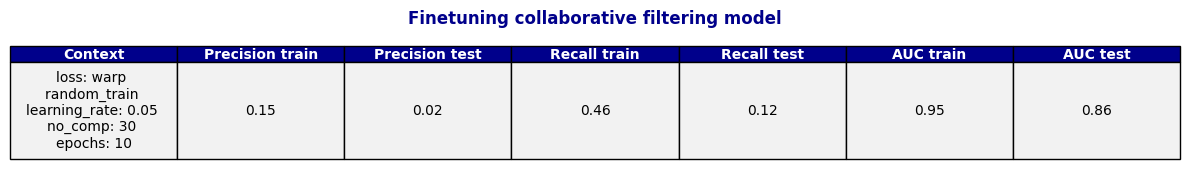

In [ ]:
#Initialize model
model_1 = LightFM(
    loss='warp',
    learning_rate=0.05,
    no_components=30,
    user_alpha=0.0001,
    item_alpha=0.0001
)

#Train model
model_1.fit(
    random_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics( model_1, random_train, random_test, "Fine-tuning collaborative filtering model", "loss: warp \nrandom_train \nlearning_rate: 0.05 \nno_comp: 30 \nepochs: 10")

Our model is good at ranking and finding relevant items (high AUC and moderate recall).

But, too many top recommended items are irrelevant (low precision).

I'll fine-tune again our model to adjust these values.

We'll change the loss now, we'll replace WARP by BPR.

Epoch: 100%|██████████| 10/10 [00:45<00:00,  4.53s/it]


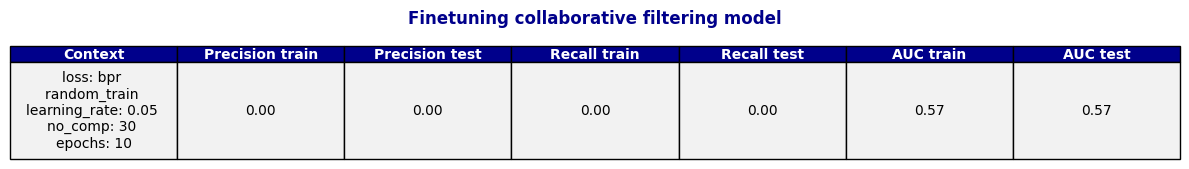

In [ ]:
#Initialize model
model_2 = LightFM(
    loss='bpr',
    learning_rate=0.05,
    no_components=30,
    user_alpha=0.0001,
    item_alpha=0.0001
)

#Train model
model_2.fit(
    random_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(model_2, random_train, random_test, "Fine-tuning collaborative filtering model", "loss: bpr \nrandom_train \nlearning_rate: 0.05 \nno_comp: 30 \nepochs: 10")

BPR loss is definitely not the right one, we’ll continue using WARP loss.

We'll try using the out-split mode to divide our data into training and testing dataframes.

Epoch: 100%|██████████| 10/10 [01:01<00:00,  6.19s/it]


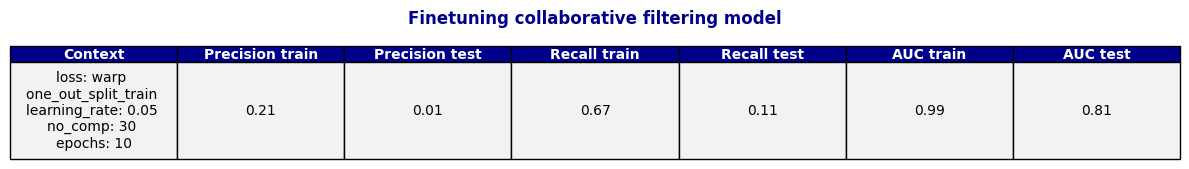

In [ ]:
#Initialize model
model_3 = LightFM(
    loss='warp',
    learning_rate=0.05,
    no_components=30,
    user_alpha=1e-5,
    item_alpha=1e-5
)

#Train model
model_3.fit(
    one_out_split_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(model_3, one_out_split_train, one_out_split_test, "Fine-tuning collaborative filtering model", "loss: warp \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 30 \nepochs: 10")

So now we can say that out-split mode is the best to divide our data into training and testing dataframes.

We'll try now the WARP-KOS loss.

Epoch: 100%|██████████| 10/10 [01:32<00:00,  9.25s/it]


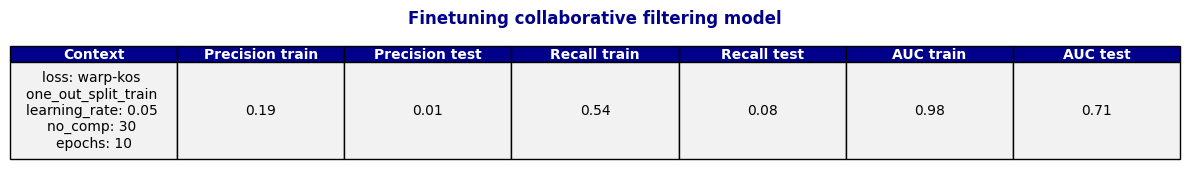

In [55]:
#Initialize model
model_4 = LightFM(
    loss = 'warp-kos',
    no_components = 30,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
model_4.fit(
    one_out_split_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(model_4, one_out_split_train, one_out_split_test, "Fine-tuning collaborative filtering model", "loss: warp-kos \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 30 \nepochs: 10")

Precision is a little worst with these model, we'll keep WARP.
Now, we'll upgrade learning-rate.

In [56]:
#Initialize model
model_5 = LightFM(
    loss = 'warp',
    no_components = 30,
    learning_rate = 0.1,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

Epoch: 100%|██████████| 10/10 [01:02<00:00,  6.23s/it]


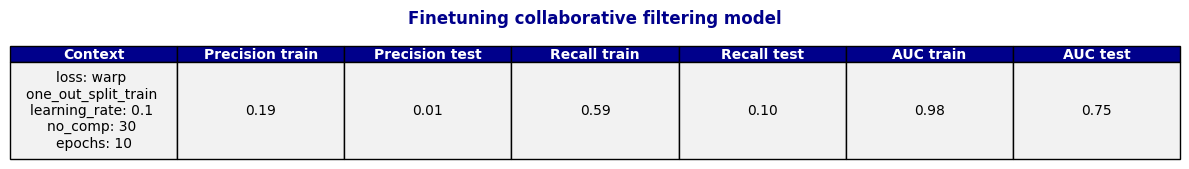

In [57]:
#Train model
model_5.fit(
    one_out_split_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(model_5, one_out_split_train, one_out_split_test, "Fine-tuning collaborative filtering model", "loss: warp \none_out_split_train \nlearning_rate: 0.1 \nno_comp: 30 \nepochs: 10")

We can now try reducing the learning rate down to 0.01.

Epoch: 100%|██████████| 10/10 [01:02<00:00,  6.25s/it]


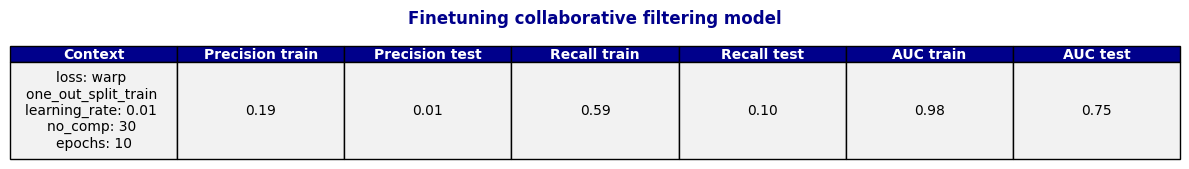

In [58]:
#Initialize model
model_6 = LightFM(
    loss = 'warp',
    no_components = 30,
    learning_rate = 0.01,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
model_6.fit(
    one_out_split_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(model_6, one_out_split_train, one_out_split_test, "Fine-tuning collaborative filtering model", "loss: warp \none_out_split_train \nlearning_rate: 0.01 \nno_comp: 30 \nepochs: 10")

##### 4.2.2: Evaluate model

We have demonstrated that that best hyper-parameters for our model are :  

* loss: warp
* train split mode : one_out_split_train
* learning_rate: 0.05
* no_comp: 30
* epochs: 10

Finally, all we have to do is train him longer and more intensively.

Epoch: 100%|██████████| 30/30 [03:09<00:00,  6.31s/it]


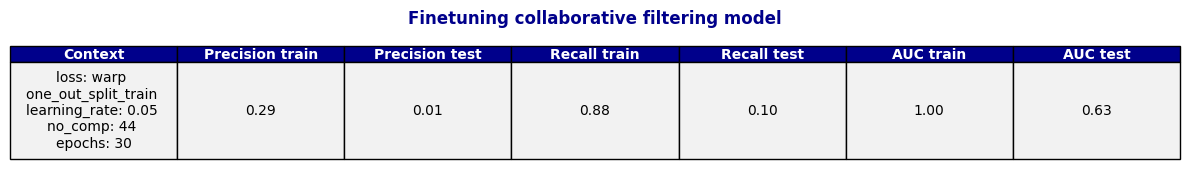

In [59]:
#Initialize model
end_collaborative_filtering_model = LightFM(
    loss = 'warp',
    no_components = 44,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
end_collaborative_filtering_model.fit(
    one_out_split_train,
    epochs=30,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(end_collaborative_filtering_model, one_out_split_train, one_out_split_test, "Fine-tuning collaborative filtering model", "loss: warp \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 44 \nepochs: 30")

Let's see again with WARP-KOS loss.

Epoch: 100%|██████████| 30/30 [04:36<00:00,  9.21s/it]


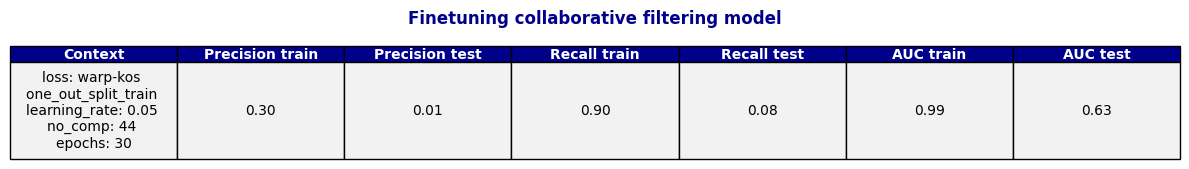

In [61]:
#Initialize model
end_collaborative_filtering_model_kos = LightFM(
    loss = 'warp-kos',
    no_components = 44,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
end_collaborative_filtering_model_kos.fit(
    one_out_split_train,
    epochs=30,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(end_collaborative_filtering_model_kos, one_out_split_train, one_out_split_test, "Fine-tuning collaborative filtering model", "loss: warp-kos \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 44 \nepochs: 30")

Here, with a longer train period, WARP-KOS seems better, let's keep it.

#### 4.3: Hybrid Filtering Models

##### 4.3.1: Build new features

We'll try to check if a model trained with all and new datas performs better.

In [60]:
# Get first & last transaction of user, number of carts in transactions (if cold user ct_carts=0)
customers_df = customers_df.merge(
    transactions_df.groupby('customer_id')['t_dat'].agg(
        t_dat_min='min', t_dat_max='max', ct_carts='nunique'
    ),
    how="left",
    left_on="customer_id",
    right_index=True
)

customers_df['ct_carts'] = customers_df['ct_carts'].fillna(0).astype('int8')

# Get maximum, mean, and minimum price customer pays for an article
price_stats = transactions_df.groupby('customer_id')['price'].agg(
    price_min='min', price_mean='mean', price_max='max'
)

# Get cart value stats per customer by summing prices per day, then aggregating per customer
cart_value_stats = transactions_df.groupby(['customer_id', 't_dat'])['price'].agg(
    cart_value='sum'
).groupby('customer_id')['cart_value'].agg(
    cart_value_min='min', cart_value_mean='mean', cart_value_max='max'
)

# Merge the results with customers_df
customers_df = customers_df.merge(price_stats, on='customer_id', how='left')
customers_df = customers_df.merge(cart_value_stats, on='customer_id', how='left')

In [62]:
transactions_merged_data_and_more = transactions_df.merge(
    customers_df,  # Only include needed columns
    on='customer_id',
    how='left'
)
transactions_merged_data_and_more = transactions_merged_data_and_more.merge(
    articles_df,  # Only include needed columns
    on='article_id',
    how='left'
)

In [63]:
transactions_merged_data_and_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196312 entries, 0 to 1196311
Data columns (total 43 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   t_dat                         1196312 non-null  datetime64[ns]
 1   customer_id                   1196312 non-null  object        
 2   article_id                    1196312 non-null  object        
 3   price                         1196312 non-null  float64       
 4   sales_channel_id              1196312 non-null  int64         
 5   club_member_status            1196312 non-null  object        
 6   fashion_news_frequency        1196312 non-null  object        
 7   age                           1196312 non-null  int8          
 8   postal_code                   1196312 non-null  int32         
 9   age_group                     1196312 non-null  object        
 10  t_dat_min                     1196312 non-null  datetime64[ns]
 11

In [64]:
interaction_matrix_all_datas = get_interaction_matrix(transactions_merged_data_and_more)


In [65]:
train_all_data, test_all_data = leave_one_out_split(interaction_matrix_all_datas)

Epoch: 100%|██████████| 10/10 [01:32<00:00,  9.21s/it]


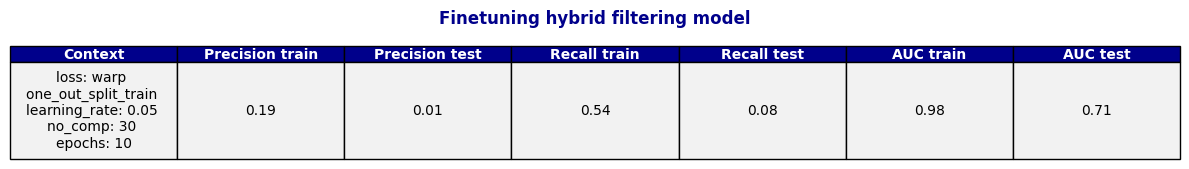

In [66]:
#Initialize model
model_all_data = LightFM(
    loss = 'warp-kos',
    no_components = 30,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
model_all_data.fit(
    train_all_data,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(model_all_data, train_all_data, test_all_data, "Fine-tuning hybrid filtering model", "loss: warp-kos \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 30 \nepochs: 10")

And yes, this model with all articles and customers datas is the the most efficient, so we'll keep it as our recommandation model.

##### 4.3.2: Removal of data with little impact

In [67]:
article_cols = ['article_id', 'product_type_name', 'index_group_name', 'garment_group_name', 'department_name', 'perceived_colour_value_name']

In [68]:
transactions_merged_data_reduced = transactions_df.merge(
    customers_df,  # Only include needed columns
    on='customer_id',
    how='left'
)
transactions_merged_data_reduced = transactions_merged_data_reduced.merge(
    articles_df[article_cols],  # Only include needed columns
    on='article_id',
    how='left'
)

In [69]:
# Create sparse matrix (users x items)
interaction_reduced_matrix = get_interaction_matrix(transactions_merged_data_reduced)

In [70]:
reduced_data_train, reduced_data_test = leave_one_out_split(interaction_reduced_matrix)

##### 4.3.3: Evaluate model

Epoch: 100%|██████████| 10/10 [01:32<00:00,  9.30s/it]


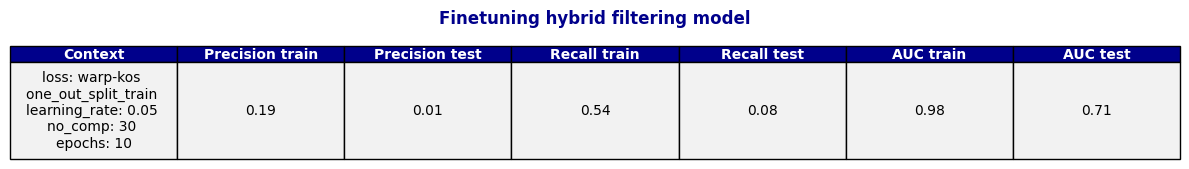

In [71]:
#Initialize model
reduced_data_model = LightFM(
    loss = 'warp-kos',
    no_components = 30,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
reduced_data_model.fit(
    reduced_data_train,
    epochs=10,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(reduced_data_model, reduced_data_train, reduced_data_test, "Fine-tuning hybrid filtering model", "loss: warp-kos \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 30 \nepochs: 10")

To build our final recommandation model, we'll train this hybrid filtering model longer and more intensively.

Epoch: 100%|██████████| 44/44 [07:06<00:00,  9.70s/it]


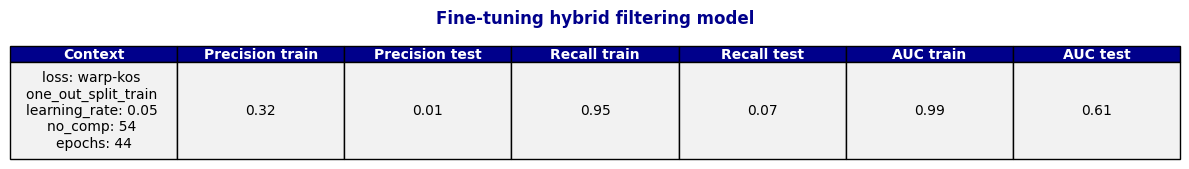

In [83]:
#Initialize model
last_model = LightFM(
    loss = 'warp-kos',
    no_components = 54,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
last_model.fit(
    train_all_data,
    epochs=44,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(last_model, train_all_data, test_all_data, "Fine-tuning hybrid filtering model", "loss: warp-kos \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 54 \nepochs: 44")

Let's try with a reduced data set, without data with little impact.

---



Epoch: 100%|██████████| 44/44 [07:08<00:00,  9.75s/it]


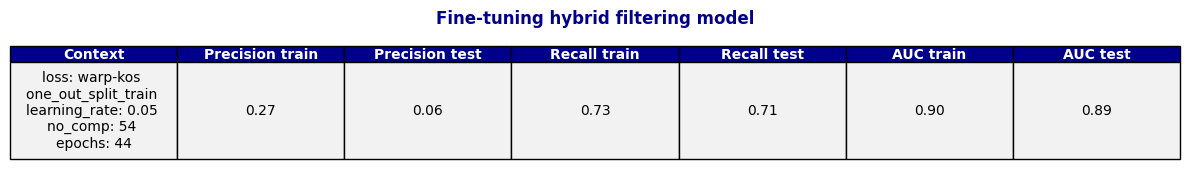

In [77]:
#Initialize model
last_reduced_model = LightFM(
    loss = 'warp-kos',
    no_components = 54,
    learning_rate = 0.05,
    user_alpha = 1e-8,
    item_alpha = 1e-8,
    learning_schedule = 'adadelta',
    max_sampled = 10
)

#Train model
last_reduced_model.fit(
    train_all_data,
    epochs=44,
    num_threads=2,
    verbose=True
)

#Model Evaluation
compute_metrics(last_reduced_model, reduced_data_train, reduced_data_test, "Fine-tuning hybrid filtering model", "loss: warp-kos \none_out_split_train \nlearning_rate: 0.05 \nno_comp: 54 \nepochs: 44")

## Part 5: Results interpretation and best model choice


<br/>

**Analysis of two previous models :**

Model build with only relevant datas :

* has much higher precision (0.06 vs. 0.01).

* has significantly higher recall (0.71 vs. 0.07).

* has better AUC (0.89 vs. 0.61).

<br/>


**Conclusion:**

<font color="#5f34ef">The hybrid filtering model, trained with only relevant datas from the initial dataset, enriched with some built synthetic datas, with this hyperparameters
*   <font color="#5f34ef">loss = warp-kos</font>
*   <font color="#5f34ef">no_components = 54</font>
*   <font color="#5f34ef">learning_rate = 0.05</font>
*   <font color="#5f34ef">o_epochs = 44</font>

is clearly better across all key metrics (precision, recall, and AUC).</font>

It means it’s better at correctly identifying relevant items (precision), finding most of the relevant items (recall), and discriminating between positive and negative classes (AUC).

## Part 6: Make recommandations

In [76]:
from tqdm import tqdm

def generate_recommendations(model, matrix, customer_ids, n=12):
    n_customers, n_articles = matrix.shape

    p = 0
    result_p = []
    for customer_id in customer_ids :
        #articles they already bought
        known_positives = matrix.tocsr()[customer_id].indices

        scores = model.predict(np.repeat(customer_id, n_articles), np.arange(n_articles))

        #rank them in order of most iked to least
        top_items = np.argsort(-scores)[:n]

        print(f"Customer {customer_id}")
        print("  Known positives:")
        print("   ", ", ".join(map(str, known_positives)))
        print("  Recommended:")
        print("   ", ", ".join(map(str, top_items)))

        known_positives_set = set(known_positives)
        top_items_set = set(top_items)

        intersection_count = len(known_positives_set.intersection(top_items_set))
        p = (intersection_count * 100) / len(known_positives_set)

        print(f"Percentage of recommended and purchased items: {p:.0f}%")
        print("-" * 40)

        result_p.append(p)

    return result_p



In [81]:
customers_ids_to_predict = customers_df['customer_id'].unique()[:10]
customer_id_to_idx = {cid: idx for idx, cid in enumerate(customers_ids_to_predict)}
indices_to_predict = [customer_id_to_idx[cid] for cid in customers_ids_to_predict]

cf_recs = generate_recommendations(last_reduced_model, interaction_reduced_matrix, indices_to_predict, 10)
r = sum(cf_recs) / 10
print("-" * 40)
print(f"For 10 customers, the average number of 10 recommended items that were actually purchased is: {r:.0f}%")

Customer 0
  Known positives:
    0, 326, 1404, 1525, 1612, 1614, 1730
  Recommended:
    1612, 1614, 326, 1404, 1525, 1730, 113, 1162, 729, 1737
Percentage of recommended and purchased items: 86%
----------------------------------------
Customer 1
  Known positives:
    1, 5, 23, 24, 29, 145, 500, 874, 927, 1047, 1446, 1820
  Recommended:
    29, 1, 145, 5, 927, 1047, 23, 1285, 874, 1106
Percentage of recommended and purchased items: 67%
----------------------------------------
Customer 2
  Known positives:
    2, 20, 65, 74, 114
  Recommended:
    20, 74, 65, 34, 127, 114, 1146, 226, 1567, 676
Percentage of recommended and purchased items: 80%
----------------------------------------
Customer 3
  Known positives:
    3, 4, 34, 57, 65, 95, 100, 114, 268, 681, 732, 740, 1492
  Recommended:
    34, 95, 3, 1492, 114, 100, 57, 1507, 56, 712
Percentage of recommended and purchased items: 54%
----------------------------------------
Customer 4
  Known positives:
    5, 6, 60, 103, 119, 244,

In [82]:
customers_ids_to_predict = customers_df['customer_id'].unique()[:10]
customer_id_to_idx = {cid: idx for idx, cid in enumerate(customers_ids_to_predict)}
indices_to_predict = [customer_id_to_idx[cid] for cid in customers_ids_to_predict]

cf_recs = generate_recommendations(last_model, interaction_matrix_all_datas, indices_to_predict, 3)
r = sum(cf_recs) / 10
print("-" * 40)
print(f"For 10 customers, the average number of 3 recommended items that were actually purchased is: {r:.0f}%")

Customer 0
  Known positives:
    0, 326, 1404, 1525, 1612, 1614, 1730
  Recommended:
    1404, 1612, 326
Percentage of recommended and purchased items: 43%
----------------------------------------
Customer 1
  Known positives:
    1, 5, 23, 24, 29, 145, 500, 874, 927, 1047, 1446, 1820
  Recommended:
    1, 145, 5
Percentage of recommended and purchased items: 25%
----------------------------------------
Customer 2
  Known positives:
    2, 20, 65, 74, 114
  Recommended:
    65, 114, 20
Percentage of recommended and purchased items: 60%
----------------------------------------
Customer 3
  Known positives:
    3, 4, 34, 57, 65, 95, 100, 114, 268, 681, 732, 740, 1492
  Recommended:
    34, 65, 284
Percentage of recommended and purchased items: 15%
----------------------------------------
Customer 4
  Known positives:
    5, 6, 60, 103, 119, 244, 260, 410, 752, 1016, 1492, 1504, 1507
  Recommended:
    60, 1492, 1016
Percentage of recommended and purchased items: 23%
--------------------

In conclusion, even if our model is better if we recommend 10 items rather than 3, we can say that our recommandation model is quite good.
<br/>

<font color="#5f34ef">**Our recommandation model is ready for production !**</font>